# Numerically solving Ordinary Differential Equations (ODEs)

In this exercise we will look at how to solve ordinary differential equations (ODEs) numerically. We will use the Euler method, look at the stability of solving ODEs numerically and at higher order methods to solve ODEs like the Runge-Kutta method. This exerxise is based on the follwing sources: https://kyleniemeyer.github.io/ME373-book/content/intro.html 

This is only a short introduction on how to solve ODEs using numerical methods. If you want to learn more about ODEs, you can take a look here: http://faculty.washington.edu/sbrunton/me564/ 
This is a complete lecture with accompanying youtube videos (https://www.youtube.com/playlist?list=PLMrJAkhIeNNTYaOnVI3QpH7jgULnAmvPA) on ODEs and numerical methods to solve them. 

> **Initial Value Problem (IVP)**
>When we look at the general form of a first-order ordinary differential equation (ODE) together with an initial condition, we have the following first order initial value problem (IVP):
>
> $$ \dot{x}(t)=f(t,x(t)), \hspace{1cm} a \leq t \leq b $$
> $$ x(a)=x_0 $$
>
> Here $t$ is called the independant variable and $x$ is called the dependant variable. The function $f$ is called the right-hand side (RHS) of the ODE. The initial condition $x(a)=x_0$ is the value of $x$ at the starting point $t=a$. If we can describe the ODE with $\dot{x} = f(t,x) = g(t) + u h(t)$, the ODE is linear, otherwise it is non-linear. The solution to an IVP is a function that satisfies the ODE and the initial condition. We can solve an ODE numerically if use the initial condition as a starting point and then march forward in time to find the particular solution.

We will look how we can solve it numerically and approximate the solution at discrete points in time using the Euler method. First let's think about how we could solve such an equation. We could integrate the equation from $t_0$ to $t_1$ to get a solution for $x(t_1)$. So let's look at how we can integrate an equation.


## Numerical integration: Trapezoidal rule

When we integrate the equationfrom above, we get:

$$ 
x(b) = \int_{a}^{b} f(x(t),t) dt, \hspace{0.2cm} x(a) = x_0
$$

where $a$ and $b$ are the start and end points of the integration.

You probably remember that you can solve a definite integrals ($ \int_a^b f(x) dx $) intgral using the **trapezoidal rule**, which finds the area under the curve by creating trapezoids and summing their areas:
$$ 
\text{area under curve} = \sum \left( \frac{f(x_{i+1}) + f(x_i)}{2} \right) \Delta x
$$ 

where $\Delta x$ is the width of the trapezoid.

## Numrically Solving ODEs using Euler's Method

When we need to solve ODEs of the form
$$
\dot{x}=f(x,t), \hspace{1cm} x(t_0)=x_0
$$
we need other methods to integrate the equation. All of them will work by starting at the initial conditions, and then using information provided by the ODE to march forward in the solution, based on an increment (i.e., step size) $\Delta x$.  

Let's look at a simple example first:

$$
\frac{dx}{dt} = 4 t - \frac{2 x}{t} , \hspace{1cm} \quad x(1) = 1
$$

For this problem we can find the general and particular solutions to compare our numerical results against:
$$
\begin{align}
\text{general: } x(t) &= t^2 + \frac{c}{t^2} \\
\text{particular: } x(t) &= t^2
\end{align}
$$

**Forward Euler Method:** Recall that the derivative, $\dot{x}$, is the same as the slope or the tangent line to the curve $x(t)$. So, if we know the value of $x$ at a point, we can approximate the value of $x$ at a later point by drawing a line with slope $\dot{x}$ and using the equation for a line to find the value of $x$ at the later point. At the starting point, $(x,t) = (1,1)$, where $\dot{x} = 2$, this looks like:

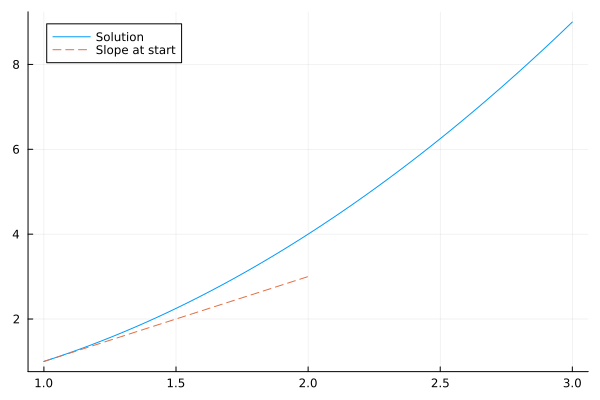

In [1]:
using Plots

t_vals = range(1, 3, length=50)
x_vals = t_vals.^2

plot(t_vals, x_vals, label="Solution")
plot!([1, 2], [1, 3], linestyle=:dash, label="Slope at start")

We want to solve the following integral: 

$$ 
x(b) = \int_{a}^{b} f(x(t),t) dt , \hspace{1cm} x(t_0) = x_0.
$$

Let's consider the initial condition — the starting point — as $(t_i, x_i)$, and the next point in our numerical solution is $(t_{i+1}, x_{i+1})$, where $i$ represents an index over the interval $[1,N]$. Our step size is then $\Delta t = t_{i+1} - t_i$.

Based on our (simple) approximation to the first derivative based on slope, we can relate the derivative to our two points:
$$
\left(\frac{dx}{dt}\right)_{i} = \frac{x_{i+1} - x_i}{t_{i+1} - t_i} = \frac{x_{i+1} - x_i}{\Delta t}
$$

Then, solve this for our unknown:
$$
x_{i+1} = x_i + \left(\frac{dx}{dt}\right)_i \Delta t
$$
This is the **Forward Euler method**. 

We can also rewrite this if we assume that $x$ is a function of $t$ and $f(x,t)$ is defined as the derivative of $x$ with respect to $t$:
$$
x(t_{i+1}) = x(t_i) + f(x(t_i),t_i) \Delta t
$$
    
where $\Delta t$ is the step size and $f(x(t_n),t_n)$ is the derivative of $x$ at $t_n$. 

We can use this to solve our equation numerically using a given step size $\Delta x$ and march forward for a given number of steps $N$. For our example this will look something like this:

In [5]:
t_exact = range(1, 3, length=50)
x_exact = t_exact .^ 2

# our derivative function, dy/dx
function dydx(t, x)
    return 4 * t - (2 * x) / t
end

dt = 0.1
t_vals = 1:dt:3
x_vals = zeros(length(t_vals))

# set initial condition
x_vals[1] = 1

1

### Task: Implement the Loop for the Forward Euler Method

In [6]:
# iterate over t_vals, calculating x_vals
for idx in 1:length(t_vals)-1
    x_vals[idx+1] = x_vals[idx] + dydx(t_vals[idx], x_vals[idx]) * dt
end

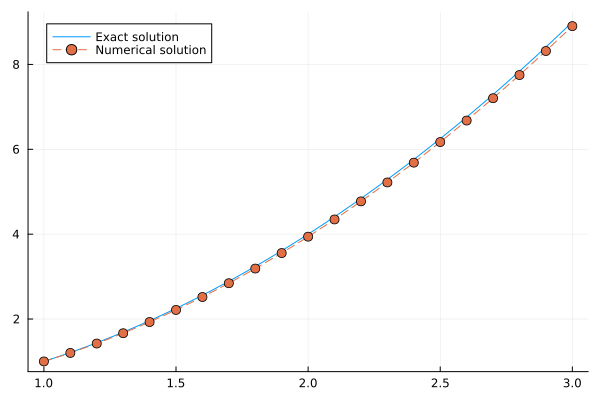

In [7]:
plot(t_exact, x_exact, label="Exact solution")
plot!(t_vals, x_vals, marker=:circle, markersize=5, linestyle=:dash, label="Numerical solution")

**Note** Another way to obtain the recursion formula for the Forward Euler method is to use a Taylor series expansion. Recall that for well-behaved functions, the Taylor series expansion says
$$
x(t + \Delta t) = x(t) + \Delta t x^{\prime}(t) + \frac{1}{2} \Delta t^2 x^{\prime\prime}(t) + \frac{1}{3!} \Delta t^3 x^{\prime\prime\prime}(t) \dots \;.
$$
When we apply this formula to our (unknown) solution $x_i$ and cut off the terms of order $\Delta t^2$ and higher; the derivative $\dot{x}$ is given by our original ODE. We can see that this gives us the same recursion formula as above. We can also see that we are introducing some error on the order of $\Delta t^2$ at each step. This is the *local truncation error*. The *global error* is the accumulation of error over all the steps, and is on the order of $\Delta t$. Thus, the Forward Euler method is a **first-order** method, because its global error is on the order of the step size to the first power: error $\sim \mathcal{O}(\Delta t)$.

**Summary** Applying the Forward Euler method requires:

1. Have a given first-order ODE: $\frac{dx}{dt} = \dot{x} = f(t,x)$. Complex and/or nonlinear problems are fine!
2. Specify the step size $\Delta t$.
3. Specify the domain over which to integrate: $t_1 \leq t \leq t_n$
4. Specify the initial condition: $x(t=t_1) = x_1$

# Stability and Stiffness

You have probably heared about **stability**, it has likely been regarding the stability of a *system*. Stable systems are those with well-behaved exact solutions, meaning they do not grow unbounded.
In engineering we mostly focus (or want!) stable systems, although there are some interesting unstable systems such as those involving resonance, nonlinear dynamics, or chaos—generally we want to know when that happens so we can prevent it.

We can also define the stability of a *numerical scheme*, which is when the numerical solution exhibits unphysical behavior. In other words, it blows up.

For example, let's consider the relatively simple 1st-order ODE
$$
\frac{dy}{dt} = -3 y
$$
with the initial condition $y(0) = 1$. As we will see, this ODE can cause explicit numerical schemes to become unstable, and thus it is a **stiff** ODE. (Note that we can easily obtain the exact solution for this problem, which is $y(t) = e^{-3 t}$.)

Let's try solving this with the Forward Euler method, integrating over $0 \leq t \leq 20$, for a range of time-step size values: $\Delta t = 0.1, 0.25, 0.5, 0.75$. 

### Task: Implement a general Forward Euler solver and plot the results for the different step sizes.

In [8]:
# dydt to integrate
f(t, y) = -3 * y

# we'll create a simple function to do forward Euler
function forward_euler(t_end, y0, dt, f)
    # Simple function to perform Forward Euler iteration
    time = 0:dt:t_end
    y = zeros(length(time))
    y[1] = y0
    for idx in 1:length(time)-1
        y[idx+1] = y[idx] + f(time[idx], y[idx]) * dt
    end
    return time, y
end

forward_euler (generic function with 1 method)

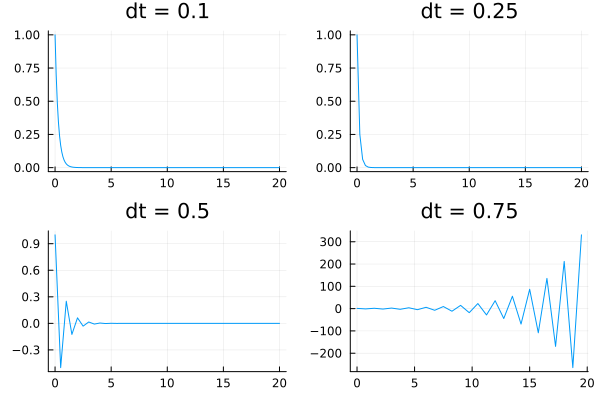

In [9]:
# initial condition
y0 = 1
t_end = 20

dt = 0.1
time, y = forward_euler(t_end, y0, dt, f)
p1 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.25
time, y = forward_euler(t_end, y0, dt, f)
p2 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.5
time, y = forward_euler(t_end, y0, dt, f)
p3 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.75
time, y = forward_euler(t_end, y0, dt, f)
p4 = plot(time, y, grid=true, title="dt = $dt")

plot(p1, p2, p3, p4, layout=(2, 2), legend=false)

At the smaller step sizes, $\Delta t = 0.1$ and $\Delta t = 0.25$, we see that the solution is well-behaved. But, when we increase $\Delta t$ to 0.5, we see some instability that goes away with time. Then, when we increase $\Delta t$ to 0.75, the solution eventually blows up, leading to error **much** larger than what we should expect based on the method's order of accuracy (first) and the step size value.

Compare this behavior to that for the ODE
$$
\frac{dy}{dt} = e^{-t}
$$
which is **non-stiff**:

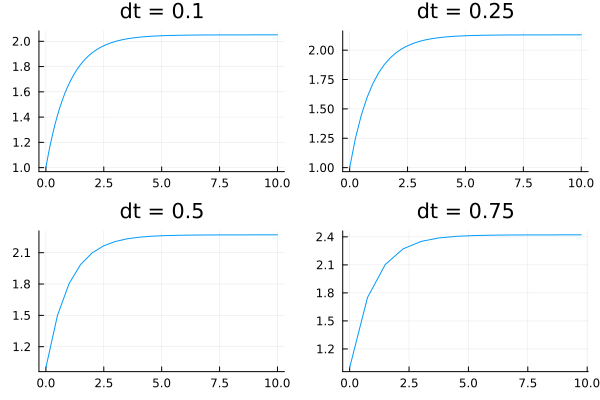

In [10]:
# dydt to integrate
f(t, y) = exp(-t)

# initial condition
y0 = 1
t_end = 10

dt = 0.1
time, y = forward_euler(t_end, y0, dt, f)
p1 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.25
time, y = forward_euler(t_end, y0, dt, f)
p2 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.5
time, y = forward_euler(t_end, y0, dt, f)
p3 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.75
time, y = forward_euler(t_end, y0, dt, f)
p4 = plot(time, y, grid=true, title="dt = $dt")

plot(p1, p2, p3, p4, layout=(2, 2), legend=false)

In this case, we see that the solution remains well-behaved even for larger time-step sizes, and the error matches the expected order based on the method and step-size value.

In general numerical schemes can be:

- **unstable**: the scheme blows up for any choice of parameters
- **conditionally stable**: the scheme is stable for a particular choice of parameters (for example, $\Delta t$ is less than some threshold)
- **unconditionally stable**: the scheme is always stable

Schemes may be stable for some problem/system and not for another, and vice versa.

Stability is related to robustness of a method, which is generally a tradeoff between complexity and computational cost. The choice of method and solution strategy depends on what you want, and how long you can wait for it. In general, we almost always want to use the largest $\Delta t$ allowable. Instead of decreasing the stepsize to avoid stability issues we can also use uncodiontionally stable methods. An example for this is the Backward Euler method which is an implicit Method. In contrast to the Forward Euler method (explicit method), the Backward Euler method is unconditionally stable, but it is also first-order accurate (like the Forward Euler method - you will see higher order methods further down).

In the next lecture we will have a more in depth discussion of stability and stiffness. The detailed derivation of higher order methods will also be covered in the next lecture. For now let's look at the backward Euler method.

## Backward Euler method

The Backward Euler method is very similar to the Forward Euler method, except in one way: it uses the slope at the *next* time step: 
$$
    \left(\frac{dx}{dt}\right)_{i+1} \approx \frac{x_{i+1} - x_i}{\Delta t}
$$
Then, the resulting recursion formula is
$$
x_{i+1} = x_i + \Delta t \left(\frac{dx}{dt}\right)_{i+1}, \text{or } \\
x_{i+1} = x_i + \Delta t \, f(t_{i+1}, x_{i+1})
$$
where $f(t,x) = dx/dt$.

Notice that this recursion formula cannot be directly solved, because $x_{i+1}$ shows up on both sides. This is an **implicit** method, where all the other methods we will cover (Forward Euler, Heun's, and 4th-order Runge-Kutta) are **explicit**. Implicit methods require more work to actually implement and are often more computationally expensive, but they are more stable and can be used with larger time steps.

### Backward Euler example
For example, let's again consider the relatively simple 1st-order ODE from above
$$
\frac{dy}{dt} = f(t,y) = -3 y
$$
To actually solve this problem with the Backward Euler method, we need to incorporate the derivative function $f(x,y)$ into the recursion formula and solve for $y_{i+1}$:
$$
\begin{align}
y_{i+1} &= y_i + \Delta t \, f(t_{i+1}, y_{i+1}) \\
y_{i+1} &= y_i + \Delta t \, [-3 y_{i+1}] \\
y_{i+1} (1 + 3 \Delta t) &= y_i \\
y_{i+1} &= \frac{y_i}{1 + 3 \Delta t}
\end{align}
$$

Now we have a useable recursion formula that we can use to solve this problem. Let's use the initial condition $y(0) = 1$. Let's try solving this with the Forward Euler method, integrating over $0 \leq t \leq 10$, for a range of time-step size values: $\Delta t = 0.1, 0.25, 0.5, 0.75$. 

### Task : Implement the Backward Euler method

In [11]:
# dydt to integrate
f(t, y) = -3 * y

# we'll create a simple function to do backward Euler
function backward_euler(t_end, y0, dt)
    # Simple function to perform backwar Euler iteration for dy/dt = f(t, y) = -3y
    # y_{i+1} &= \frac{y_i}{1 + 3 \Delta t}
    time = 0:dt:t_end
    y = zeros(length(time))
    y[1] = y0
    for idx in 1:length(time)-1
        t = time[idx]
        y[idx+1] = y[idx] / (1 + 3 * dt) # TODO: fill in the backward Euler iteration for y[idx+1] from the equation above 
    end
    return time, y
end

backward_euler (generic function with 1 method)

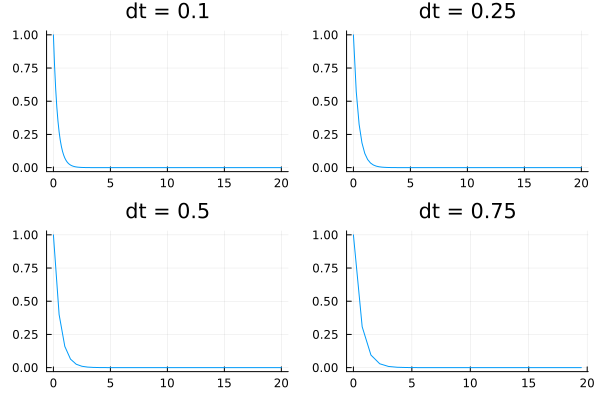

In [12]:
# initial condition
y0 = 1
t_end = 20

dt = 0.1
time, y = backward_euler(t_end, y0, dt)
p1 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.25
time, y = backward_euler(t_end, y0, dt)
p2 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.5
time, y = backward_euler(t_end, y0, dt)
p3 = plot(time, y, grid=true, title="dt = $dt")

dt = 0.75
time, y = backward_euler(t_end, y0, dt)
p4 = plot(time, y, grid=true, title="dt = $dt")

plot(p1, p2, p3, p4, layout=(2, 2), legend=false)


# Higher Order Methods

The Forward Euler method is a first-order method, meaning that the global error is on the order of the step size to the first power: error $\sim \mathcal{O}(\Delta t)$. We can do better than this and obtain higher-order methods. 

**Note** The detailed derivation of higher-order methods will be covered in the next lecture. Here, we will just take a look into how to implement them.

Let's do another example:
\begin{equation}
y^{\prime} = 8 e^{-t}(1+t) - 2y
\end{equation}
with the initial condition $y(0) = 1$, and the domain $0 \leq t \leq 7$. This is a linear 1st-order ODE that we can find the analytical solution for comparison:
\begin{equation}
y(t) = e^{-2t} (8 t e^t + 1)
\end{equation}

To solve, we'll create an function for the derivative and then incorporate that into our Forward Euler code. We'll start with $\Delta t = 0.2$.

In [13]:
# define the derivative function 
function dydt(t, y)
    return 8 * exp(-t) * (1 + t) - 2 * y
end

# Define the exact solution
function exact_solution(t)
    return exp(-2 * t) * (8 * t * exp(t) + 1)
end

exact_solution (generic function with 1 method)

Maximum error: 0.26860381419195667


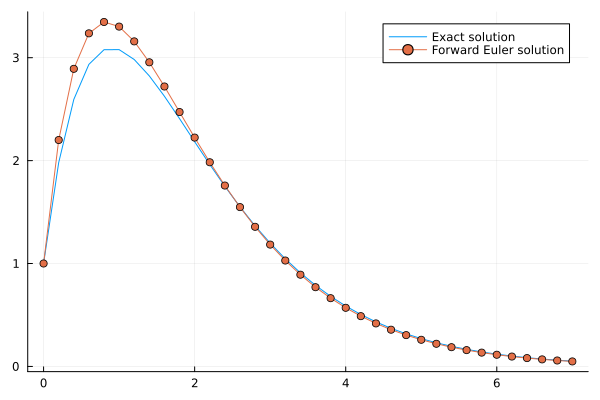

In [18]:
dt = 0.2
t_end = 7
t_vals = 0:dt:7
y_vals = zeros(length(t_vals))

# initial condition
y0 = 1

# forward Euler loop
t_vals, y_vals = forward_euler(t_end, y0, dt, dydt)

# Calculate the maximum error
y_exact = exact_solution.(t_vals)

println("Maximum error: ", abs(maximum(y_exact) - maximum(y_vals)))

plot(t_vals, y_exact, label="Exact solution")
plot!(t_vals, y_vals, marker=:circle, label="Forward Euler solution")

## Heun's method

Heun's method is a **predictor-corrector** method; these work by *predicting* a solution at some intermediate location and then using that information to get a better overall answer at the next location (*correcting*). Heun's uses the Forward Euler method to predict the solution at $x_{i+1}$, then uses the average of the slopes at $y_i$ and the predicted $y_{i+1}$ to get a better overall answer for $y_{i+1}$.

\begin{align}
\text{predictor: } y_{i+1}^p &= y_i + \Delta x f(x_i, y_i) \\
\text{corrector: } y_{i+1} &= y_i + \frac{\Delta x}{2} \left( f(x_i, y_i) + f(x_{i+1}, y_{i+1}^p) \right)
\end{align}

Heun's method is second-order accurate, meaning the global error is $\mathcal{O}(\Delta x^2)$.

Let's see this method in action:


In [15]:
dt = 0.2
t_vals = 0:dt:7
y_vals = zeros(length(t_vals))

# initial condition
y_vals[1] = 1

1

### Task : Implement Heun's method

Maximum error: 0.04140975267037117


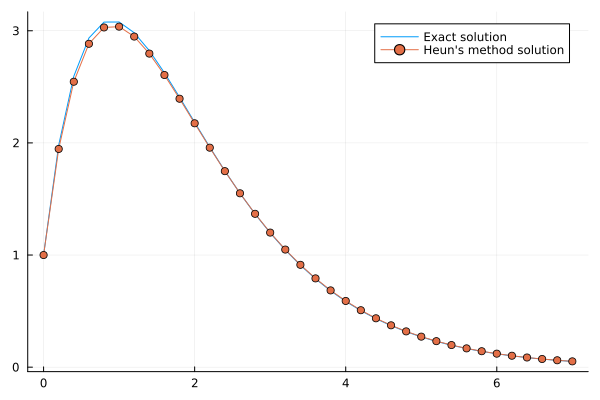

In [17]:
# Heun's method loop
for idx in 1:length(t_vals)-1
    y_p = y_vals[idx] + dt * dydt(t_vals[idx], y_vals[idx])
    y_vals[idx+1] = y_vals[idx] + (dt / 2) * (
        dydt(t_vals[idx], y_vals[idx]) +
        dydt(t_vals[idx+1], y_p)
    )
end

# Calculate the maximum error
y_exact = exact_solution.(t_vals)

println("Maximum error: ", abs(maximum(y_exact) - maximum(y_vals)))

plot(t_vals, y_exact, label="Exact solution")
plot!(t_vals, y_vals, marker=:circle, label="Heun's method solution")

Notice how the error is visibly smaller than for the Forward Euler method–the maximum error is around 0.041, which is very close to $\Delta x^2 = 0.04$.

## Runge-Kutta methods

Runge–Kutta methods are a family of methods that use one or more stages; the methods we have discussed so far (Forward Euler and Heun's) actually all fall in this family. There is also a popular fourth-order method: the **fourth-order Runge–Kutta method** (RK4). This uses four stages to get a more accurate solution:
\begin{align}
y_{i+1} &= y_i + \frac{\Delta x}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
k_1 &= f(x_i, y_i) \\
k_2 &= f \left( x_i + \frac{\Delta x}{2}, y_i + \frac{\Delta x}{2} k_1 \right) \\
k_3 &= f \left( x_i + \frac{\Delta x}{2}, y_i + \frac{\Delta x}{2} k_2 \right) \\
k_4 &= f \left( x_i + \Delta x, y_i + \Delta x \, k_3 \right)
\end{align}

This method is explicit and fourth-order accurate: error $\sim \mathcal{O}(\Delta x^4)$:

Maximum error: 0.000308437774888759


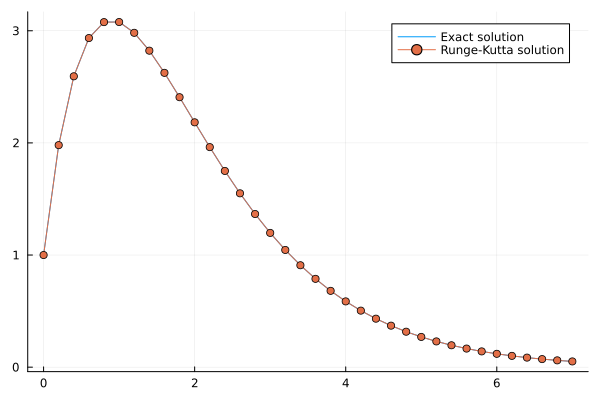

In [20]:
dt = 0.2
t_vals = 0:dt:7
y_vals = zeros(length(t_vals))

# initial condition
y_vals[1] = 1

# 4th order Runge-Kutta iteration
for idx in 1:length(t_vals)-1
    t_val = t_vals[idx]
    k1 = dydt(t_val, y_vals[idx])
    k2 = dydt(t_val + dt / 2, y_vals[idx] + dt * k1 / 2)
    k3 = dydt(t_val + dt / 2, y_vals[idx] + dt * k2 / 2)
    k4 = dydt(t_val + dt, y_vals[idx] + dt * k3)
    y_vals[idx+1] = y_vals[idx] + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6
end


println("Maximum error: ", abs(maximum(y_exact) - maximum(y_vals)))

plot(t_vals, y_exact, label="Exact solution")
plot!(t_vals, y_vals, marker=:circle, label="Runge-Kutta solution")

## Solving ODEs using Julia SciML 
Julia offers a very powerful ecosystem for solving differential equations which is called SciML. You can think of Julia's SciML as SciPy or MATLAB's standard library but in Julia. It is a collection of packages that are used to solve differential equations. The SciML ecosystem is built on top of the Julia programming language which means it is really fast and easy to use. Also it is fully compatible with machine learning and automatic differentiation (and also supports GPUs - this is a huge plus compared to other packages which often are not compatibel with machine learning libraries). An Introduction to the SciML ecosystem can be found here: https://docs.sciml.ai/Overview/stable/getting_started/getting_started/

We will use the OrdinaryDiffEq package to solve the ODEs. An introduction on how to solve differential equations using this package can be found here: https://docs.sciml.ai/DiffEqDocs/stable/getting_started/

In [ ]:
using Pkg
Pkg.add("OrdinaryDiffEq")

Lets test the SciML package on the ODE we have already solved using our own implemented solvers. We will use the same ODE as before and then call the `ODEProblem` function.
This function has the following fields

    f: The function in the ODE.
    u0: The initial condition.
    tspan: The timespan for the problem.
    p: The parameters.
    kwargs: The keyword arguments passed onto the solves. For example dt for the time step size.

Maximum error: 0.00025450216912492607


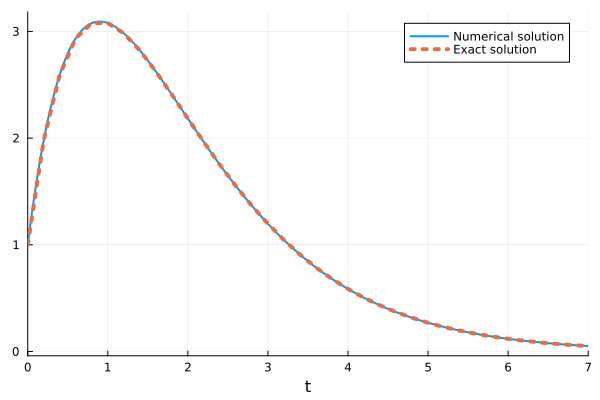

In [21]:
using OrdinaryDiffEq

# Define the function, this is the same as dydt above but reframed for the ODEProblem type
function simple_f(dy, y, p, t)
    dy[1] = 8 * exp(-t) * (1 + t) - 2 * y[1]
end

# Initial conditions
y₀ = [1.0]
tspan = (0.0, 7.0)
dt = 0.2

# Define the problem
prob = ODEProblem(simple_f, y₀, tspan, dt=dt)

# Solve the problem using the RK4 (Runge-Kutta) algorithm
sol = solve(prob, RK4())

# Calculate the maximum error
t_vals = 0:dt:7
exact_vals = exact_solution.(t_vals)
numerical_vals = [sol(t)[1] for t in t_vals]
max_error = maximum(abs.(exact_vals .- numerical_vals))

println("Maximum error: ", max_error)

# Plot the solution
plot(sol, lw=2, label="Numerical solution")
plot!(t_vals, exact_vals, lw=4, ls=:dot, label="Exact solution")


### Simple Harmonic Oscillator Problem

We will take a look at a physical example known as the Simple Harmonic Oscillator. This is a classic problem in physics that describes the motion of a mass attached to a spring. The force exerted by the spring is proportional to the displacement of the mass from its equilibrium position, but in the opposite direction. This is often referred to as Hooke's law and can be written as:

$$
F = -kx
$$

where $F$ is the force, $k$ is the spring constant, and $x$ is the displacement.

By Newton's second law, we know that $F = ma$, where $m$ is the mass and $a$ is the acceleration. Acceleration is the second derivative of the position with respect to time, so we can write this as $a = \frac{d^2x}{dt^2}$. Substituting this into the equation gives us the differential equation for the simple harmonic oscillator:

$$
m\frac{d^2x}{dt^2} = -kx
$$

or, rearranging:

$$
\frac{d^2x}{dt^2} = -\frac{k}{m}x
$$

This is a second-order ODE that describes the motion of the mass. In the case of a simple harmonic oscillator, the ratio $\frac{k}{m}$ is often replaced by $\omega^2$, where $\omega$ is the angular frequency of the oscillator.

In the following Julia code, we define the problem by implementing a `harmonicoscillator` function, which implements the second-order ODE. We also set the initial conditions for the position `x₀` and velocity `dx₀`, as well as the time span for the simulation.


#### Implementing and Solving the Harmonic Oscillator in Julia:

The Implementation of the harmonic oscillator problem and how to solve it using the `OrdinaryDiffEq` package is described here: https://docs.sciml.ai/DiffEqDocs/stable/examples/classical_physics/#Second-Order-Linear-ODE 

Consider a mass-spring system with an angular frequency of $1$ rad/s, initial displacement of $0$ m, and initial velocity of $π/2$ m/s. The ODE becomes:

In [22]:
#Parameters
ω = 1

#Initial Conditions
dt = 0.1
x₀ = [0.0]
dx₀ = [π / 2]
tspan = (0.0, 2π)

ϕ = atan((dx₀[1] / ω) / x₀[1])
A = √(x₀[1]^2 + dx₀[1]^2)

#Define the problem
function harmonicoscillator(ddu, du, u, ω, t)
    ddu .= -ω^2 * u
end

harmonicoscillator (generic function with 1 method)

Now we pass our `harmonicoscillator` function to the `SecondOrderODEProblem` function toegteher with arguments for the initial conditions and the time span. We will also define a solver. As a starting point we add `Euler()` as a solver. Since this is a discrete solver we also need to define a step size. We will use a step size of 0.5. Note that this stepsize is passen to the  `SecondOrderODEProblem` function not the `solve` function.

We will notice that this solver is not very accurate. The error is quite large. This is because the Euler method is a first order method. In general there are different ways to improve the results. One way is to reduce the step size. This will however increase the computational cost. Another way is to use a better (higher order) solver. You can try to use a different solver and see if you can reduce the error. 

### Task: Add a another solver and try to reduce the error 

You can find a list of solvers here: https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/ 

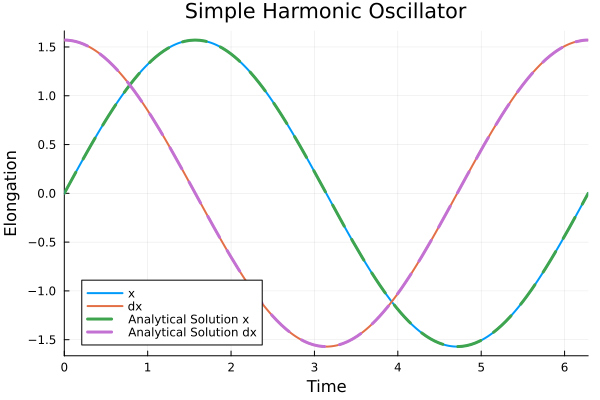

In [24]:
#Pass to solvers
prob = SecondOrderODEProblem(harmonicoscillator, dx₀, x₀, tspan, ω, dt=dt)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

#Plot
plot(sol, vars=[2, 1], linewidth=2, title="Simple Harmonic Oscillator",
    xaxis="Time", yaxis="Elongation", label=["x" "dx"])
plot!(t -> A * cos(ω * t - ϕ), lw=3, ls=:dash, label="Analytical Solution x")
plot!(t -> -A * ω * sin(ω * t - ϕ), lw=3, ls=:dash, label="Analytical Solution dx")

If we consider a mass-spring system with an angular frequency of 1 rad/s, initial displacement of 2 m, and initial velocity of 0.0 m/s. The ODE becomes:

In [27]:
using OrdinaryDiffEq, Plots
#Parameters
ω = 2

#Initial Conditions
x₀ = [2.0]
dx₀ = [0.0] # [π / 2]
tspan = (0.0, 2π)

ϕ = atan((dx₀[1] / ω) / x₀[1])
A = √(x₀[1]^2 + dx₀[1]^2)

#Define the problem
function harmonicoscillator_2(ddu, du, u, ω, t)
    ddu .= -ω^2 * u
end


harmonicoscillator_2 (generic function with 1 method)

You can try your solver on this ODE as well.

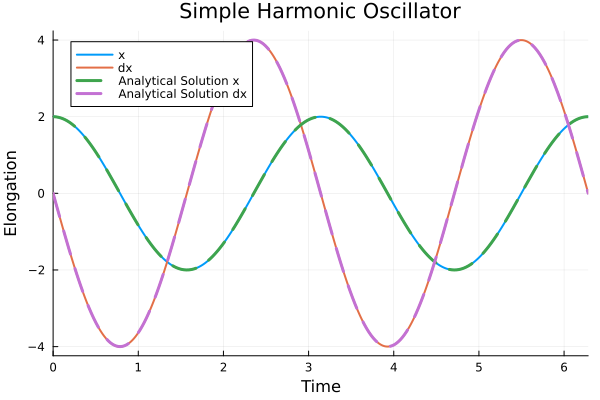

In [28]:
#Pass to solvers
prob_2 = SecondOrderODEProblem(harmonicoscillator_2, dx₀, x₀, tspan, ω)
sol_2 = solve(prob_2, RK4()) # Add the solver here

#Plot
plot(sol_2, vars=[2, 1], linewidth=2, title="Simple Harmonic Oscillator",
    xaxis="Time", yaxis="Elongation", label=["x" "dx"])
plot!(t -> A * cos(ω * t - ϕ), lw=3, ls=:dash, label="Analytical Solution x")
plot!(t -> -A * ω * sin(ω * t - ϕ), lw=3, ls=:dash, label="Analytical Solution dx")